### Data Analysis with Python
# Car Price Prediction
#### This project creates a regression model to predict the price of Cars.

### Loading necessary modules

In [1]:
# importing all necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import missingno as msno 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data

This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

* 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
* Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
* Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Content

This data set consists of three types of entities: 
* the specification of an auto in terms of various characteristics, 
* its assigned insurance risk rating, 
* its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc), and represents the average loss per car per year.

In [2]:
# Loading Data
mydata = pd.read_csv('raw_automobile_data.csv')
mydata.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Data Wrangling

In [3]:
mydata.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [4]:
df=mydata.drop(['Unnamed: 0'], axis = 1)
df.sample(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
155,0,91.0,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,8778.0
170,2,134.0,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0
100,0,106.0,nissan,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97.0,5200.0,27,34,9549.0
118,1,119.0,plymouth,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,37,41,5572.0
188,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100.0,5500.0,26,32,9995.0
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
88,-1,137.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
46,2,NaN,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048.0
28,-1,110.0,dodge,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88.0,5000.0,24,30,8921.0
186,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,8495.0


In [5]:
df.shape

(205, 26)

### Checking for Duplicate rows

In [6]:
duplicate = df[df.duplicated()]  
print("Duplicate Rows :")  
duplicate 

Duplicate Rows :


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


There are no duplicate rows.

### Identify and handle missing values

In [7]:
df = df.replace('?',np.NAN) 

#### Checking for missing values:

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We see that there are missing values as follows
- There are 41 missing values in normalized-losses
- There are 2 missing values in num-of-doors
- There are 4 missing values in bore
- There are 4 missing values in stroke
- There are 2 missing values in horsepower
- There are 2 missing values in peak-rpm
- There are 4 missing values in price

#### Deal with missing data
How to deal with missing data? What can we do?
 1. drop data
    - drop the whole row
    - drop the whole column
 2. replace data
    - replace it by mean
    - replace it by frequency
    - replace it based on other functions

### Idea:

#### Here we want to predict car price. So we can do the following:

##### Replace by mean for the numeric columns
- "normalized-losses": 41 missing data, replace them with mean 
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean 
- "peak-rpm": 2 missing data, replace them with mean


In [9]:
# Countinig bedrooms categories
df['num-of-doors'].value_counts().to_frame()

,num-of-doors
four,114
two,89


##### Replace by highest frequency for categorical column (replace by mostly repeated item)
- "num-of-doors": 2 missing data, replace them with "four". Since four doors is most frequent, it is most likely to occur

##### Drop the whole row for the column to be predicted (do not use approximated values)
 - "price": 4 missing data, simply delete the whole row


#### Calculate the average of the column and Replace "NaN" by mean value in the column



#### "normalized-losses"


In [10]:
avg_norm_loss = df['normalized-losses'].astype("float").mean() 
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### "bore"

In [11]:
avg_bore = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, avg_bore, inplace = True)

#### "stroke"

In [12]:
avg_stroke =df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, avg_stroke, inplace = True)

#### "horsepower"

In [13]:
avg_horsepower = df['horsepower'].mean()
df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)

#### "peak-rpm"

In [14]:
avg_peak_rpm = df['peak-rpm'].mean()
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace= True)

#### "num-of-doors"

In [15]:
df['num-of-doors'].replace(np.nan, "four", inplace = True)

#### Price: dropping all rows of price with nan values

In [16]:
#simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True) 

In [17]:
# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [18]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

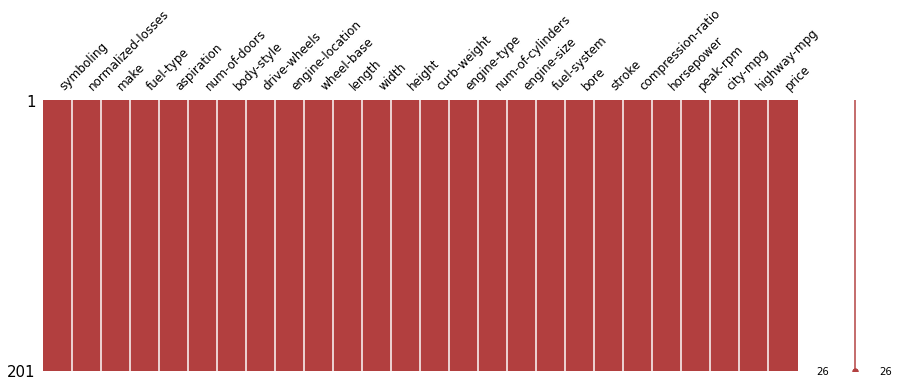

In [19]:
#Graphically
msno.matrix(df, figsize=(15,5), fontsize=12, color=(0.7, 0.25, 0.25));

This shows that there is no missing data in the dataset.

### Correcting data format

#### Lets list the data types for each column

In [20]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##### 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.


#### Changing data format

In [21]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float") 
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int") 
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [22]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Exploratory Data Analysis

### Target Variable:
We are going to predict the Price of a car, So 'price' is the target or dependent variable.

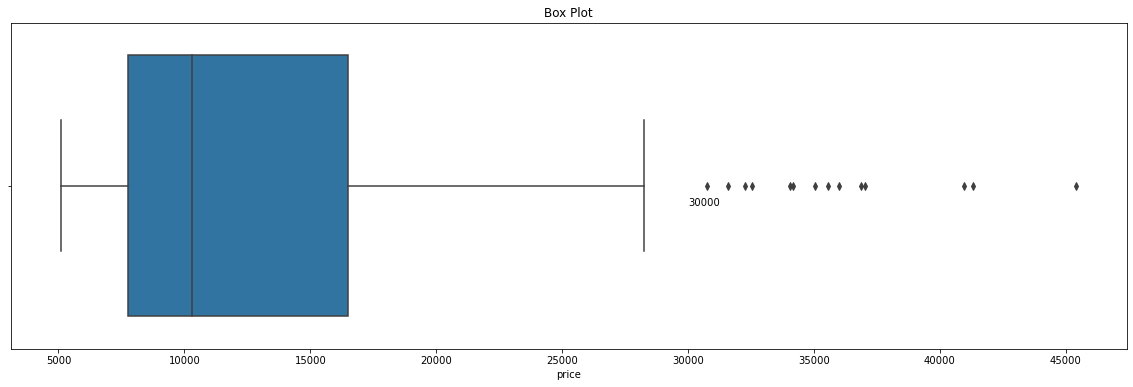

In [23]:
fig, ax = plt.subplots(1,1,figsize=(20,6))
ax.set(title='Box Plot')
sns.boxplot(x = df['price'])
ax.annotate(str('30000'),(30000,0.06))
plt.show()

There are cars having price more than $30000.

### Categorical Features

##### Make

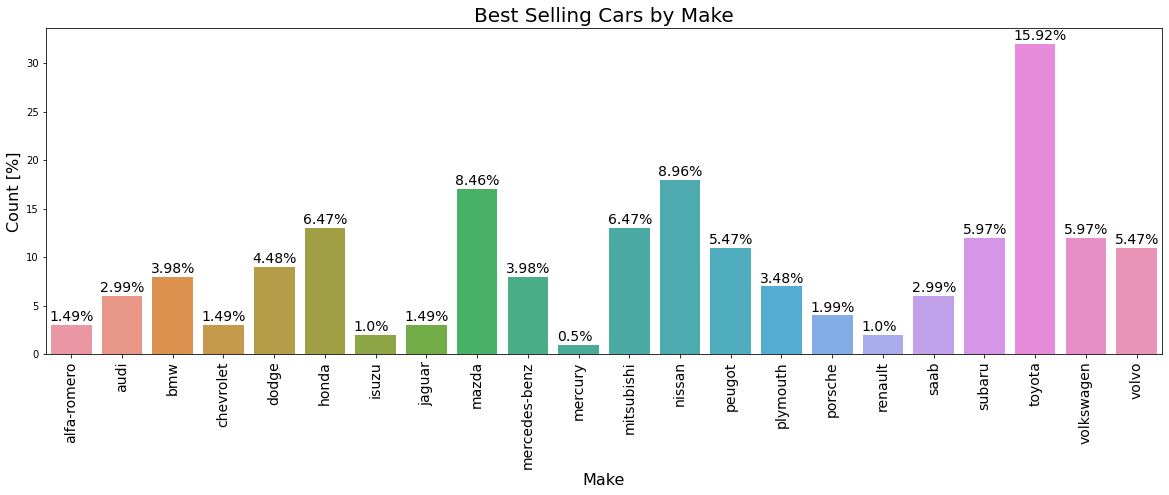

In [24]:
plt.figure(figsize=(20, 6))
ax=sns.countplot(df['make'], )
total = len(df['make'])
for i in ax.patches:
         ax.text(i.get_x()-.03, i.get_height()+.4, 
                 str(round((i.get_height()/total)*100, 2))+'%', fontsize=14)
plt.title('Best Selling Car''s by Make',fontsize=20)
plt.xticks(rotation=90, horizontalalignment="center", fontsize=14)
plt.xlabel('Make', fontsize=16)
plt.ylabel('Count [%]', fontsize=16)
plt.show()

The top 5 companies by sales are as follows:

In [25]:
round((df['make'].value_counts(normalize = True)*100),2).to_frame().head(5)

,make
toyota,15.92
nissan,8.96
mazda,8.46
honda,6.47
mitsubishi,6.47


#### fuel-type , num-of-doors, body-style, drive-wheels, engine-location, engine-type

In [26]:
round((df['fuel-type'].value_counts(normalize = True)*100),2).to_frame()

,fuel-type
gas,90.05
diesel,9.95


In [27]:
round((df['num-of-doors'].value_counts(normalize = True)*100),2).to_frame()

,num-of-doors
four,57.21
two,42.79


In [28]:
round((df['body-style'].value_counts(normalize = True)*100),2).to_frame()

,body-style
sedan,46.77
hatchback,33.83
wagon,12.44
hardtop,3.98
convertible,2.99


In [29]:
round((df['drive-wheels'].value_counts(normalize = True)*100),2).to_frame()

,drive-wheels
fwd,58.71
rwd,37.31
4wd,3.98


In [30]:
round((df['engine-location'].value_counts(normalize = True)*100),2).to_frame()

,engine-location
front,98.51
rear,1.49


In [31]:
round((df['engine-type'].value_counts(normalize = True)*100),2).to_frame()

,engine-type
ohc,72.14
ohcf,7.46
ohcv,6.47
l,5.97
dohc,5.97
rotor,1.99


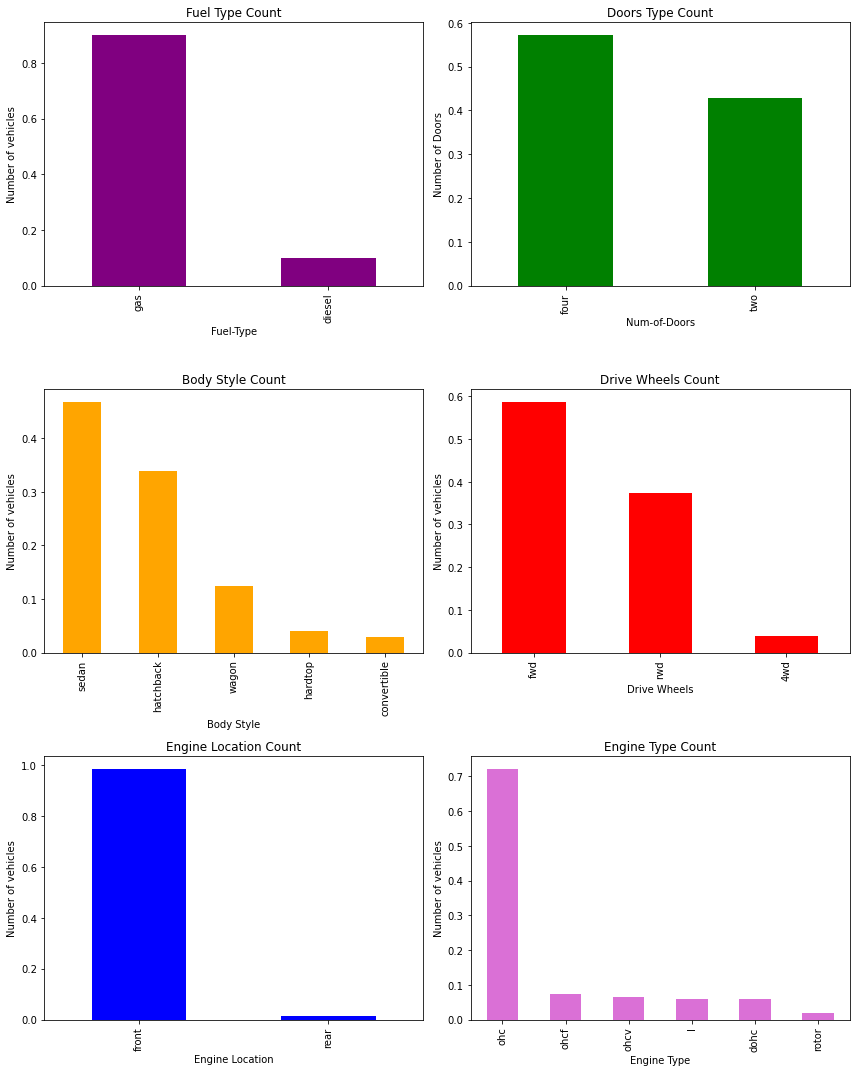

In [32]:
plt.subplot(321)
df['fuel-type'].value_counts(normalize= True).plot(figsize=(12,15),kind='bar',color='purple')
plt.title("Fuel Type Count")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel-Type');

plt.subplot(322)
df['num-of-doors'].value_counts(normalize=True).plot(figsize=(12,15),kind='bar',color='green')
plt.title("Doors Type Count")
plt.ylabel('Number of Doors')
plt.xlabel('Num-of-Doors');

plt.subplot(323)
df['body-style'].value_counts(normalize=True).plot(figsize=(12,15),kind='bar',color='orange')
plt.title("Body Style Count")
plt.ylabel('Number of vehicles')
plt.xlabel('Body Style');

plt.subplot(324)
df['drive-wheels'].value_counts(normalize=True).plot(figsize=(12,15),kind='bar',color='red')
plt.title("Drive Wheels Count")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive Wheels');

plt.subplot(325)
df['engine-location'].value_counts(normalize=True).plot(figsize=(12,15),kind='bar',color='blue')
plt.title("Engine Location Count")
plt.ylabel('Number of vehicles')
plt.xlabel('Engine Location');


plt.subplot(326)
df['engine-type'].value_counts(normalize=True).plot(figsize=(12,15),kind='bar',color='orchid')
plt.title("Engine Type Count")
plt.ylabel('Number of vehicles')
plt.xlabel('Engine Type');

plt.tight_layout()
plt.show()

**Findings**

* Most selling car is of brand Toyota. This brand has 16% sales of total sales.
* More than 90% of the vehicle have fuel type gas.
* More than 57% of the cars have four door.
* Mostly produced vehicle are of body style sedan around 48% followed by hatchback 32%.
* 59% of the cars have fwd, 37% have rwd and 4% have 4wd.
* 99% of the cars have engine at front.
* More than 70 % of the vehicle has Ohc type of Engine

### Price vs other variables

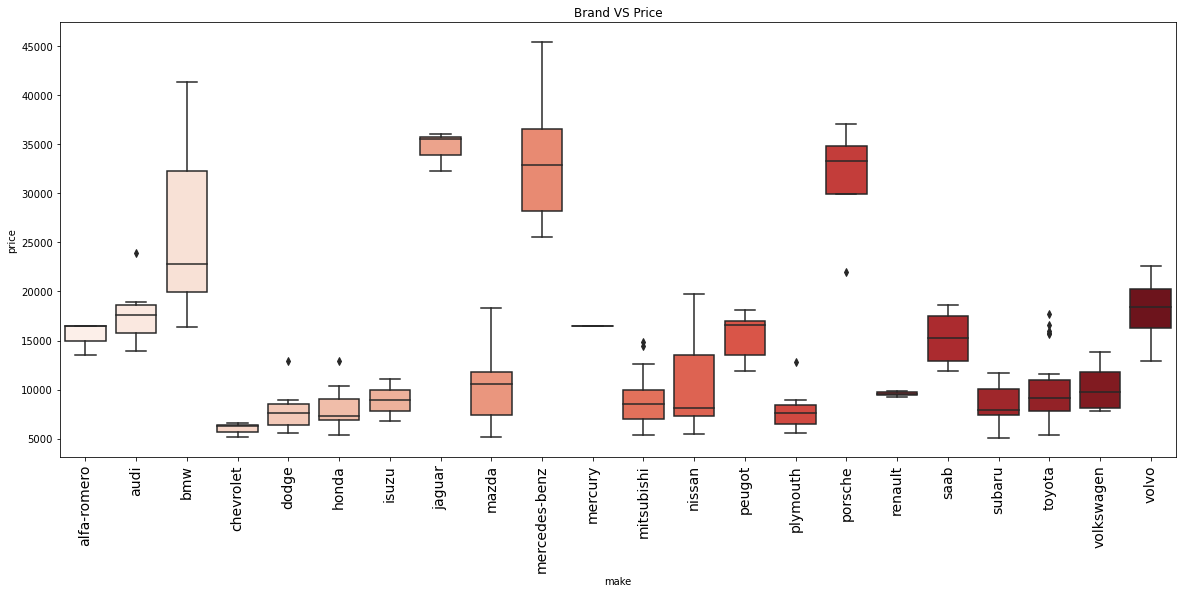

In [33]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="make", y="price", data=df, palette='Reds' )
plt.xticks(rotation=90, horizontalalignment="center", fontsize=14)
plt.title('Brand VS Price')
plt.show()

Mercedes benz and BMW are expensive cars.

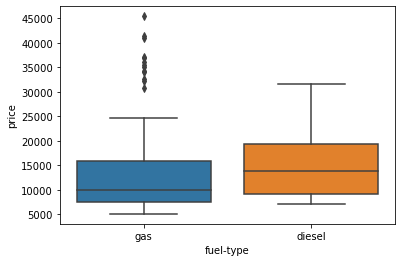

In [34]:
sns.boxplot(x="fuel-type", y="price", data=df)
plt.show()

Disel Cars are more expensive.

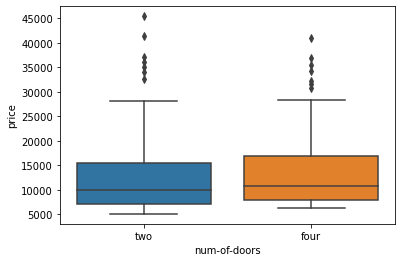

In [35]:
sns.boxplot(x="num-of-doors", y="price", data=df)
plt.show()

Four door Cars are more expensive.

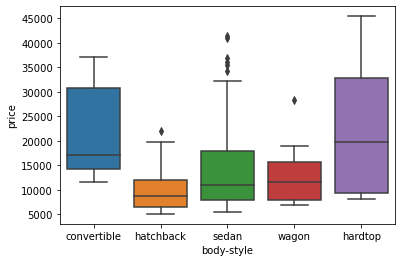

In [36]:
sns.boxplot(x="body-style", y="price", data=df)
plt.show()

Hardtop and convertible Cars are more expensive.

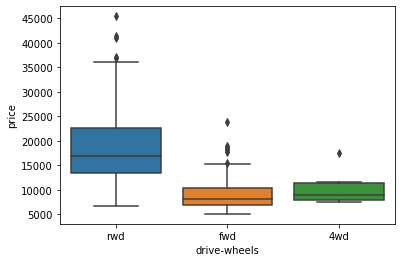

In [37]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()

RWD Cars are more expensive.

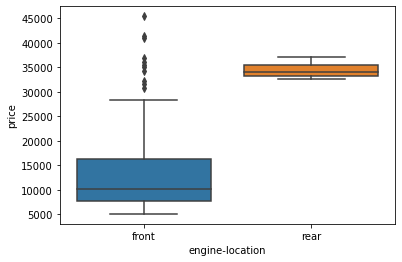

In [38]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show()

Cars having engine at front are more expensive.

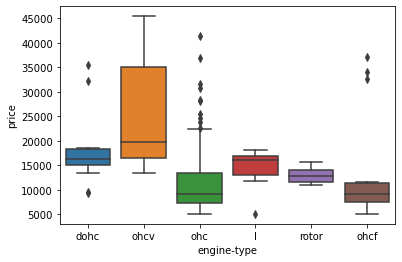

In [39]:
sns.boxplot(x="engine-type", y="price", data=df)
plt.show()

Cars having engine ohcv are more expensive.

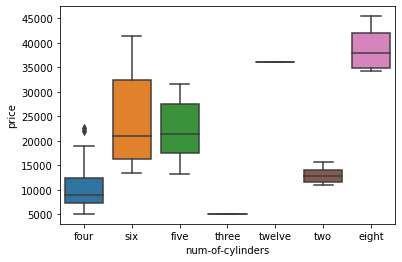

In [40]:
sns.boxplot(x="num-of-cylinders", y="price", data=df)
plt.show()

Car Price increases with the number of cylinders.

### Numeric Variables
The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.00,0.00,1.000000,2.00,3.00
normalized-losses,201.0,122.000000,31.996250,65.00,101.00,122.000000,137.00,256.00
wheel-base,201.0,98.797015,6.066366,86.60,94.50,97.000000,102.40,120.90
length,201.0,174.200995,12.322175,141.10,166.80,173.200000,183.50,208.10
width,201.0,65.889055,2.101471,60.30,64.10,65.500000,66.60,72.00
height,201.0,53.766667,2.447822,47.80,52.00,54.100000,55.50,59.80
curb-weight,201.0,2555.666667,517.296727,1488.00,2169.00,2414.000000,2926.00,4066.00
engine-size,201.0,126.875622,41.546834,61.00,98.00,120.000000,141.00,326.00
bore,201.0,3.330692,0.268072,2.54,3.15,3.310000,3.58,3.94
stroke,201.0,3.256874,0.316048,2.07,3.11,3.290000,3.41,4.17


### Distribution of Features

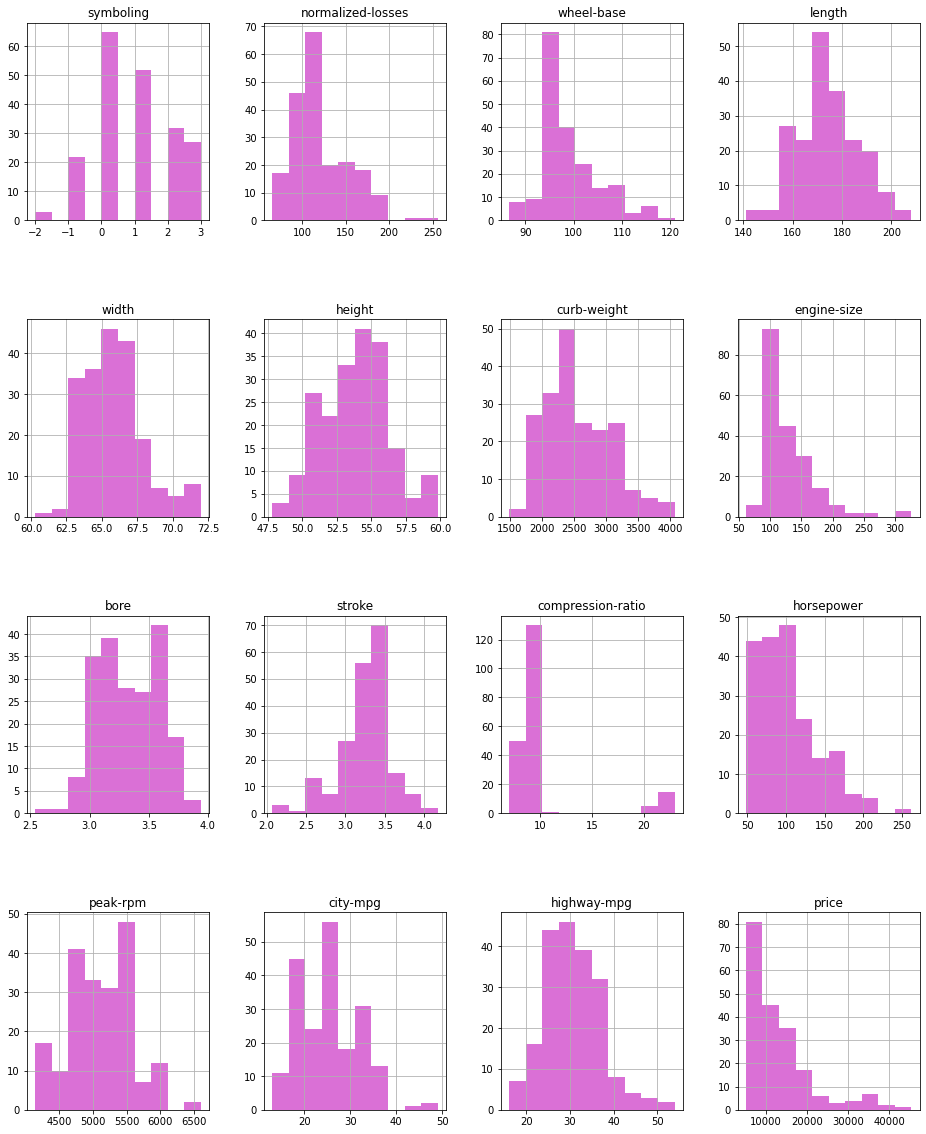

In [42]:
df.hist(figsize=(16,20), color = 'orchid')
plt.subplots_adjust(hspace=0.5)
plt.show()

This shows that some of the features have not good distribution.

### Pair Plot

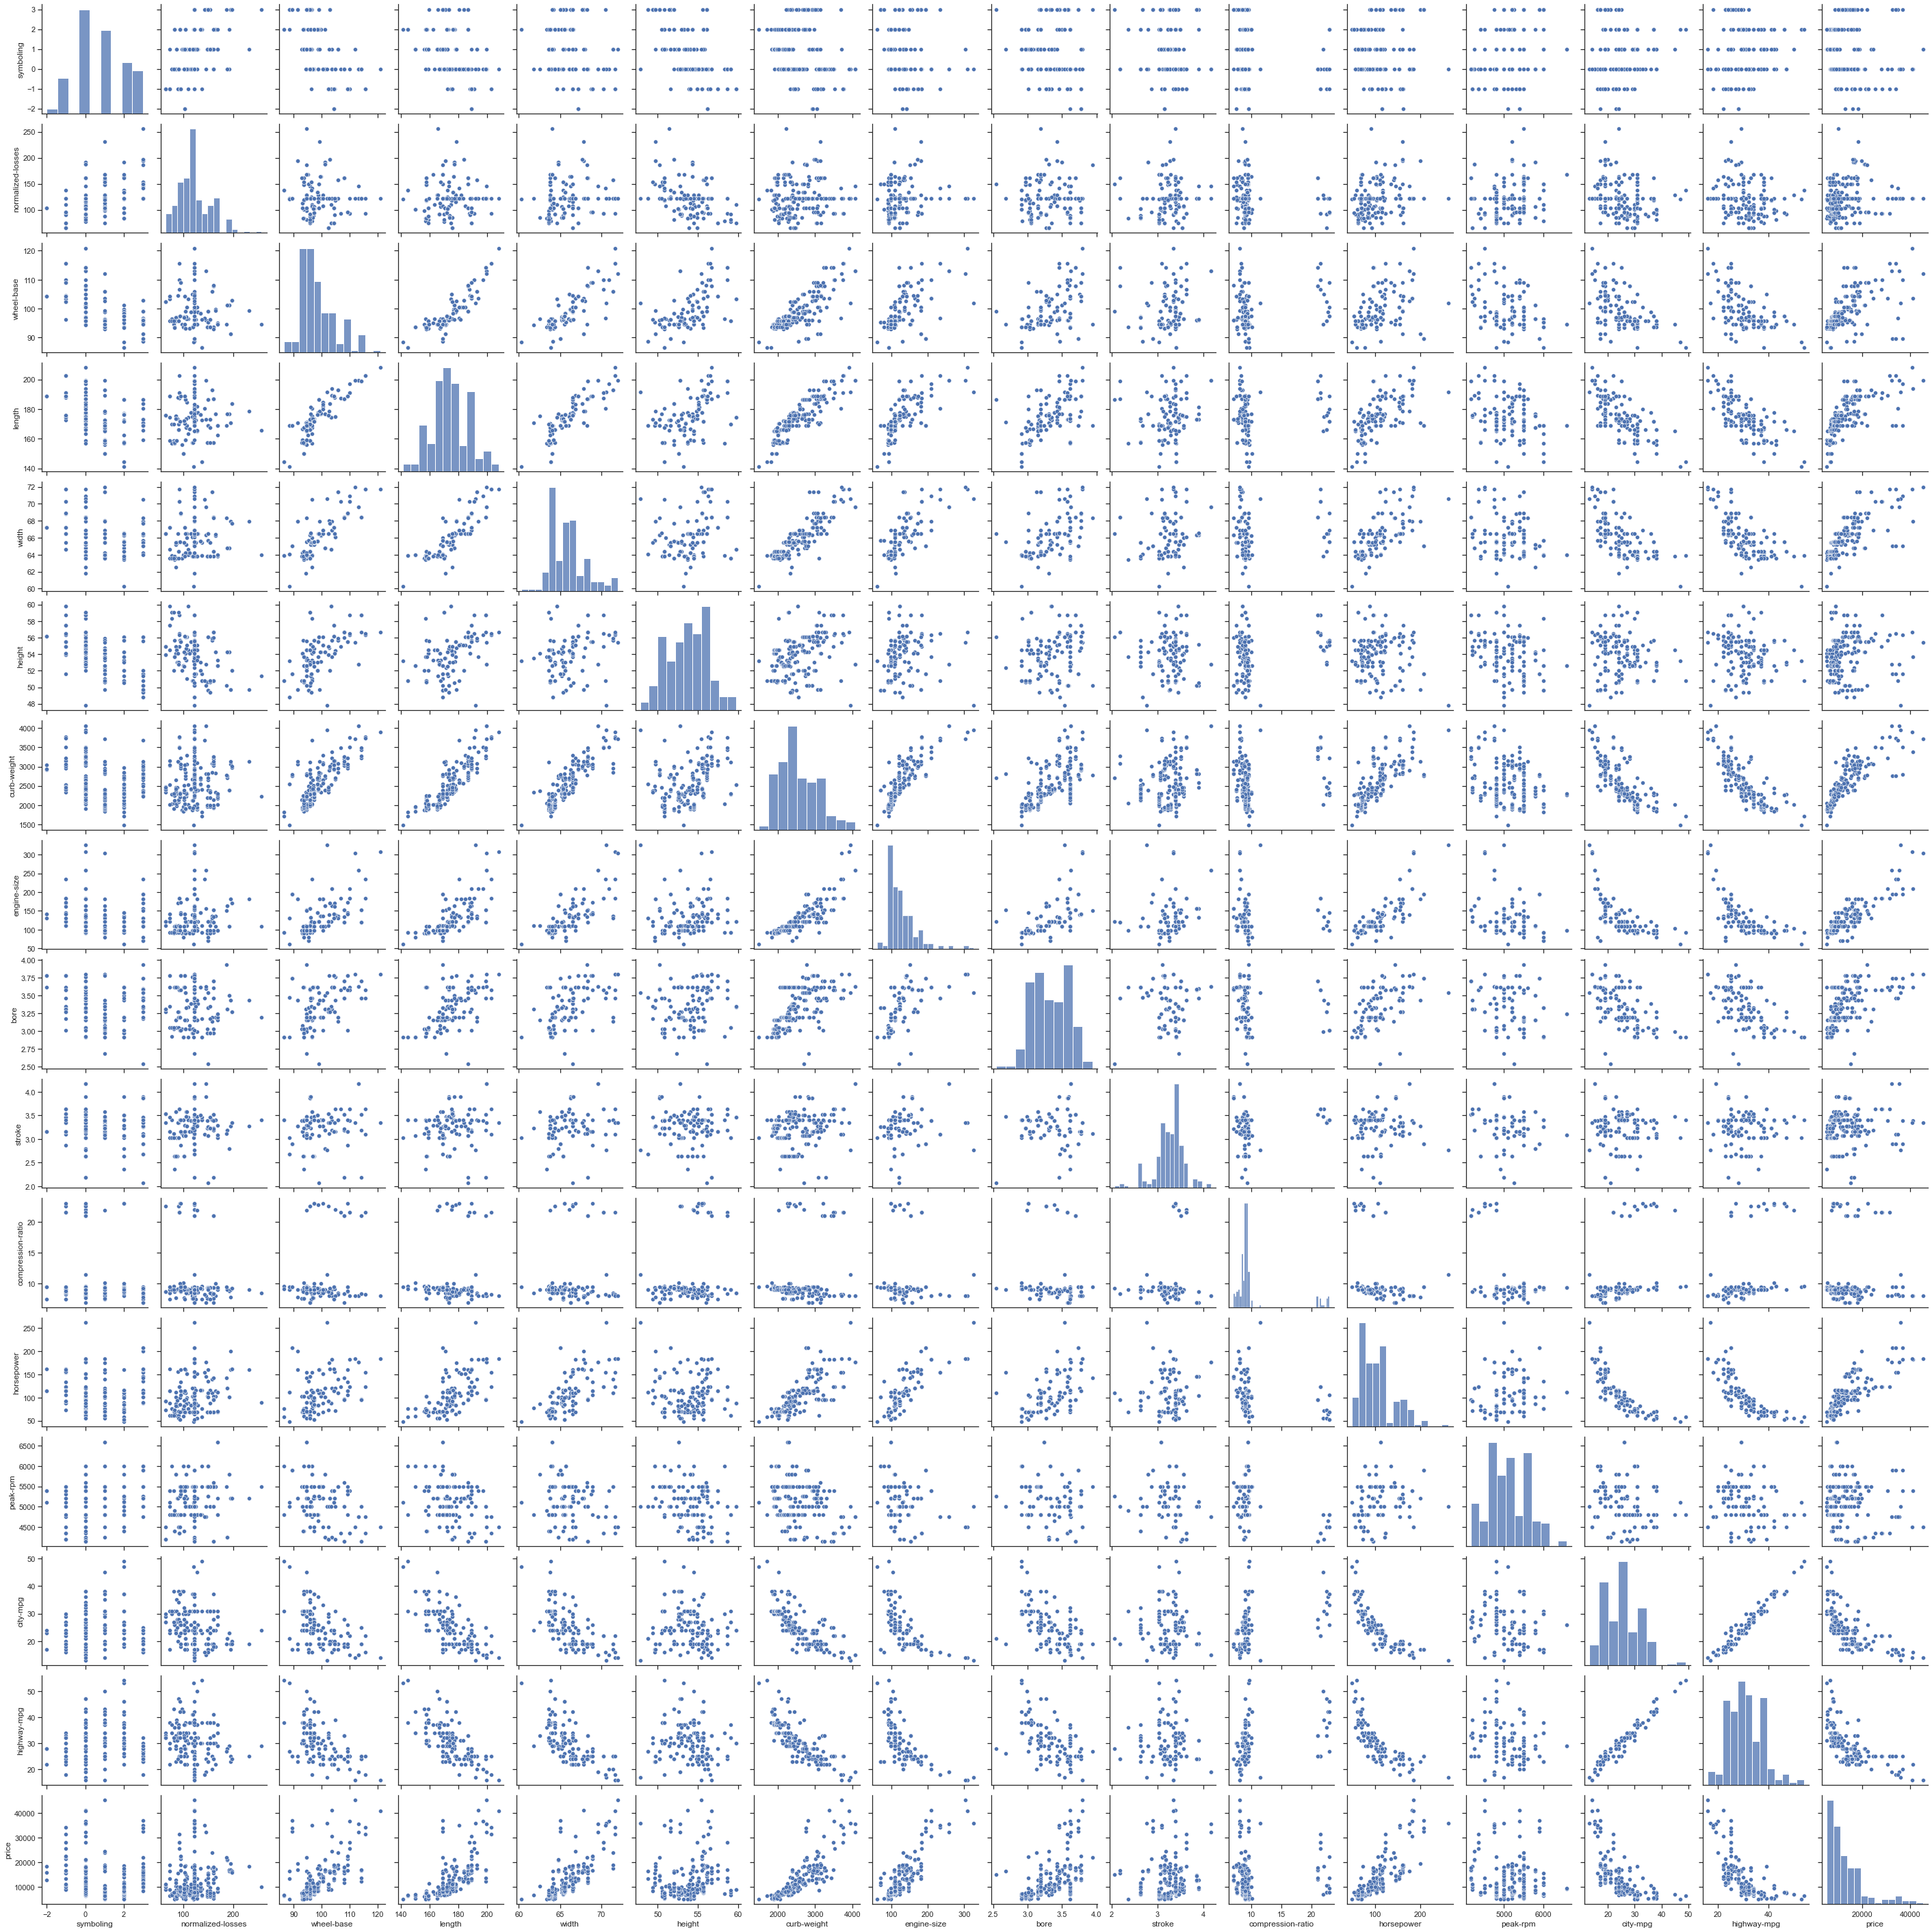

In [43]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)
plt.show()

### Heat Map

In [44]:
# get correlation matrix
corr = df.corr()

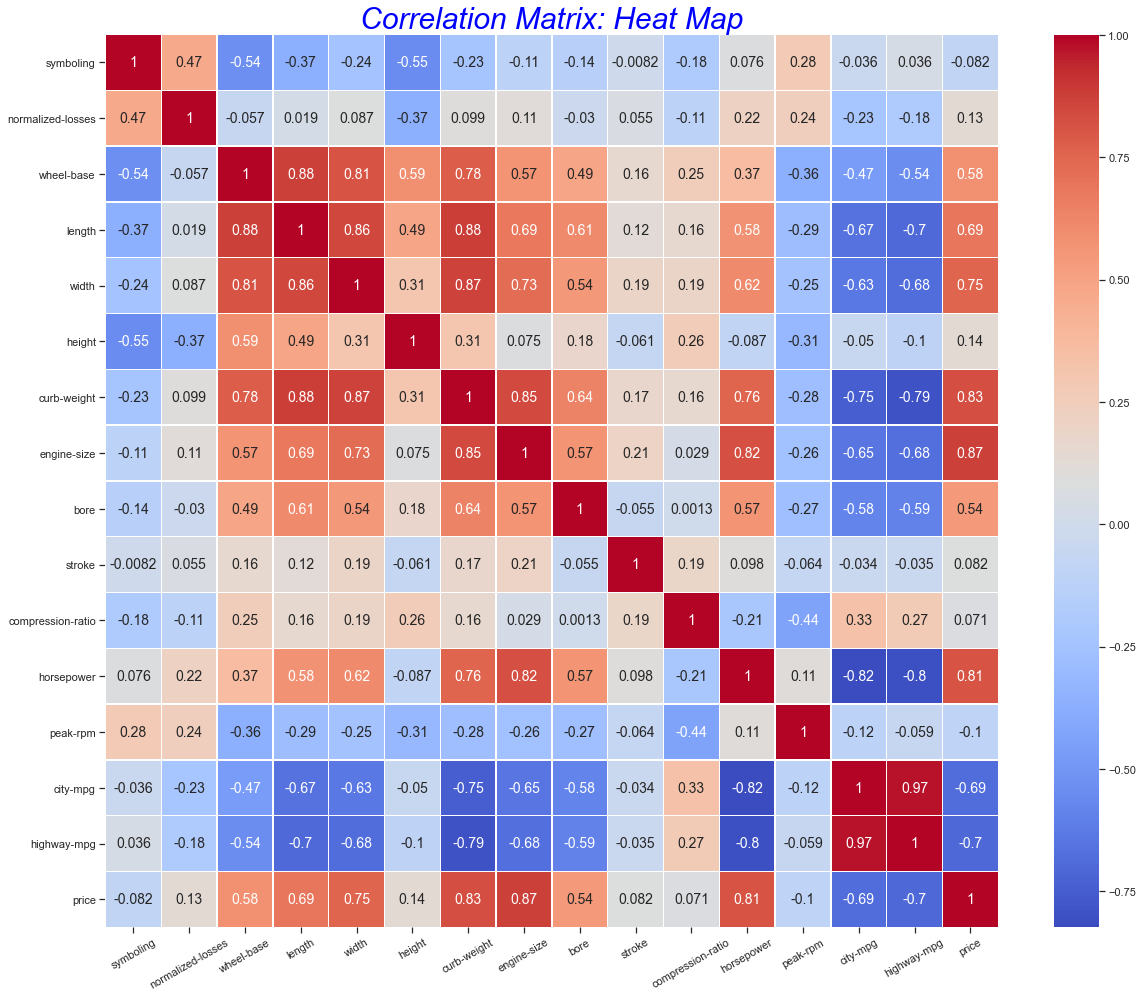

In [45]:
# Heat map using seaborn

plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5,vmax= 1 ,square=True, annot = True, 
            linecolor='w', annot_kws={"size":14}, cbar_kws={"shrink": 0.82})
plt.xticks(rotation=30, horizontalalignment="center")
plt.title('Correlation Matrix: Heat Map', fontsize = 30, color='Blue', fontstyle='italic')
plt.show()

### Sorting the correlation of features with price

In [46]:
df.corr()['price'].sort_values(ascending = False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
stroke               0.082269
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [47]:
df.shape

(201, 26)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

### Indicator variable (or dummy variable)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

We can use categorical variables for regression analysis in the later modules. For example, We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression understand only numbers. To use this attribute in regression analysis, we convert "fuel-type" into numbers.

In [49]:
# Preprocessing
from sklearn import preprocessing

label_fule_type = preprocessing.LabelEncoder()
label_fule_type.fit(['gas','diesel'])
df.iloc[:,3] = label_fule_type.transform(df.iloc[:,3]) 

label_aspiration = preprocessing.LabelEncoder()
label_aspiration.fit(['std','turbo'])
df.iloc[:,4] = label_aspiration.transform(df.iloc[:,4]) 

label_num_door = preprocessing.LabelEncoder()
label_num_door.fit(['four','two'])
df.iloc[:,5] = label_num_door.transform(df.iloc[:,5]) 

label_engine_location = preprocessing.LabelEncoder()
label_engine_location.fit(['front','rear'])
df.iloc[:,8] = label_engine_location.transform(df.iloc[:,8]) 

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,1,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,1,0,1,convertible,rwd,0,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122,alfa-romero,1,0,1,hatchback,rwd,0,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,1,0,0,sedan,fwd,0,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,1,0,0,sedan,4wd,0,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### One Hot Encoding

In [50]:
df1 = df.drop(['make', 'body-style',  'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis=1)

In [51]:
df2 = pd.concat([df1, pd.get_dummies(df[['make', 'body-style',  'drive-wheels', 'engine-type', 
                                        'num-of-cylinders', 'fuel-system']])], axis=1)
df = df2
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122,1,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
1,3,122,1,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,0,0
2,1,122,1,0,1,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,1,0,0
3,2,164,1,0,0,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,1,0,0
4,2,164,1,0,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,1,0,0


In [52]:
df.shape

(201, 71)

In [53]:
y1 = df['price'].values
X1 = df.drop(['price'], axis=1 )

[0.02869806 0.04847732 0.00503807 0.01331914 0.02959716 0.00093749
 0.0339435  0.0341259  0.03288429 0.04657574 0.18578513 0.0297397
 0.03118142 0.0272359  0.02926352 0.03651218 0.02671109 0.05404402
 0.0443089  0.00500456 0.00318711 0.00254353 0.00215511 0.0021509
 0.00469893 0.00203284 0.00167    0.00645751 0.0029411  0.00093855
 0.00629061 0.00778404 0.00174198 0.00314526 0.00156232 0.00155718
 0.00213999 0.00356365 0.00956818 0.00455352 0.00312695 0.00514309
 0.00710949 0.02373951 0.02774347 0.01301969 0.00573748 0.01169029
 0.00926013 0.00362797 0.0023059  0.0102369  0.00335678 0.00447544
 0.00089014 0.00089029 0.00329036 0.00683072 0.00533469 0.00020828
 0.00073459 0.00083182 0.00354605 0.01036932 0.00088282 0.00463523
 0.0006741  0.0102639  0.00545805 0.00052119]


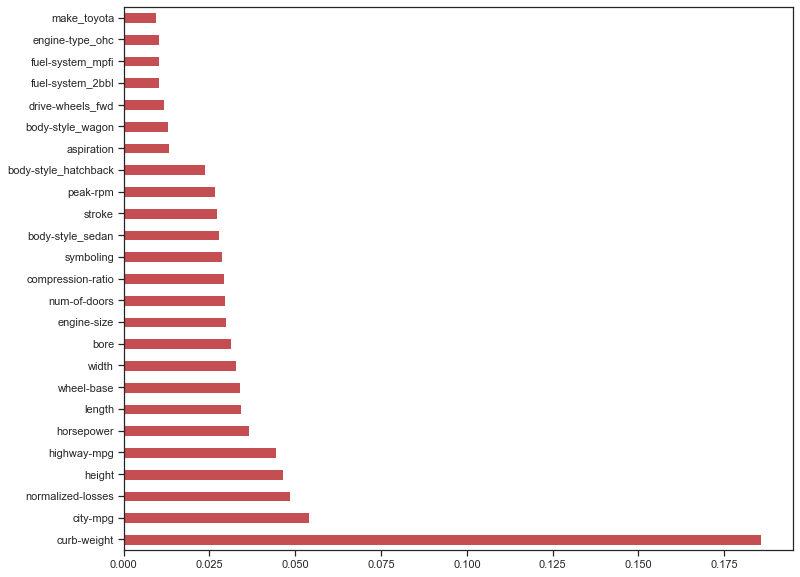

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X1,y1)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(25).plot(kind='barh', color = 'r', figsize=(12,10))
plt.show()

In [55]:
df2.corr()['price'].sort_values(ascending = False).head(20)

price                     1.000000
engine-size               0.872335
curb-weight               0.834415
horsepower                0.809575
width                     0.751265
length                    0.690628
drive-wheels_rwd          0.637522
wheel-base                0.584642
bore                      0.543155
make_mercedes-benz        0.524953
fuel-system_mpfi          0.509698
num-of-cylinders_six      0.486096
num-of-cylinders_eight    0.461834
engine-type_ohcv          0.394454
make_jaguar               0.332180
make_bmw                  0.331607
engine-location           0.331062
make_porsche              0.327029
num-of-cylinders_five     0.254019
body-style_hardtop        0.231180
Name: price, dtype: float64

In [56]:
df2.corr()['price'].sort_values(ascending = False).tail(10)

make_honda              -0.166603
fuel-system_1bbl        -0.171540
make_toyota             -0.182313
body-style_hatchback    -0.293121
engine-type_ohc         -0.332851
fuel-system_2bbl        -0.497825
drive-wheels_fwd        -0.595979
city-mpg                -0.686571
num-of-cylinders_four   -0.691968
highway-mpg             -0.704692
Name: price, dtype: float64

Based on these threee results I am going to choose following 25 features as important features.

In [57]:
features = ['curb-weight', 'city-mpg', 'normalized-losses', 'height', 'highway-mpg', 'horsepower', 'length', 'width', 
            'compression-ratio','num-of-doors','wheel-base', 'bore','engine-size', 'stroke','symboling', 'peak-rpm', 
            'num-of-cylinders_four','num-of-cylinders_six', 'num-of-cylinders_eight',
            'drive-wheels_fwd',  'drive-wheels_rwd','fuel-system_2bbl', 'fuel-system_mpfi', 
            'body-style_hatchback', 'body-style_sedan', 'body-style_wagon']

In [58]:
X = df[features]
X[0:5]

,curb-weight,city-mpg,normalized-losses,height,highway-mpg,horsepower,length,width,compression-ratio,num-of-doors,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_eight,drive-wheels_fwd,drive-wheels_rwd,fuel-system_2bbl,fuel-system_mpfi,body-style_hatchback,body-style_sedan,body-style_wagon
0,2548,21,122,48.8,27,111.0,168.8,64.1,9.0,1,...,1,0,0,0,1,0,1,0,0,0
1,2548,21,122,48.8,27,111.0,168.8,64.1,9.0,1,...,1,0,0,0,1,0,1,0,0,0
2,2823,19,122,52.4,26,154.0,171.2,65.5,9.0,1,...,0,1,0,0,1,0,1,1,0,0
3,2337,24,164,54.3,30,102.0,176.6,66.2,10.0,0,...,1,0,0,1,0,0,1,0,1,0
4,2824,18,164,54.3,22,115.0,176.6,66.4,8.0,0,...,0,0,0,0,0,0,1,0,1,0


### Standardizing Data

Data Standardization gives the data with zero mean and unit variance 

In [59]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-0.01485764, -0.65224901,  0.        , -2.03408071, -0.54228772,
         0.20375448, -0.43940949, -0.85346024, -0.29143464,  1.15637766,
        -1.6851071 ,  0.5209658 ,  0.07538912, -1.82983334,  1.72504964,
        -0.24671775,  0.52939095, -0.36822985, -0.1424941 , -1.19234506,
         1.29614814, -0.68348613,  1.0884772 , -0.7150372 , -0.9372858 ,
        -0.37688918],
       [-0.01485764, -0.65224901,  0.        , -2.03408071, -0.54228772,
         0.20375448, -0.43940949, -0.85346024, -0.29143464,  1.15637766,
        -1.6851071 ,  0.5209658 ,  0.07538912, -1.82983334,  1.72504964,
        -0.24671775,  0.52939095, -0.36822985, -0.1424941 , -1.19234506,
         1.29614814, -0.68348613,  1.0884772 , -0.7150372 , -0.9372858 ,
        -0.37688918]])

### Normalizing price

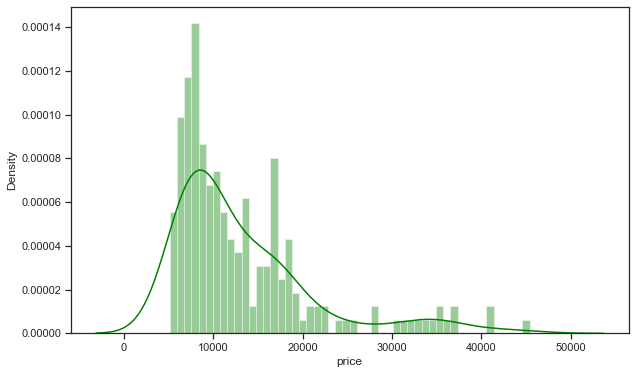

In [60]:
plt.figure(figsize=(10,6))
sns.distplot(df2["price"], bins = 50, color='green', kde = True)
plt.show()

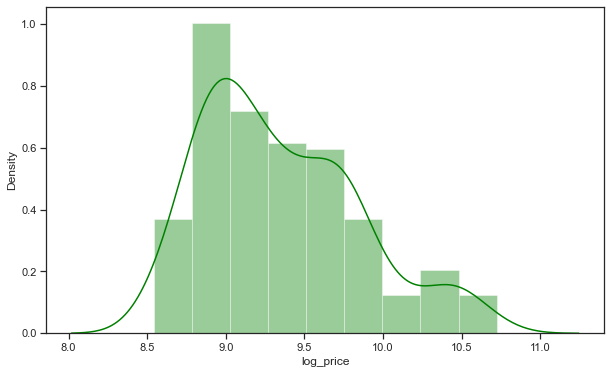

In [61]:
df["log_price"] = np.log(df2["price"])
plt.figure(figsize=(10,6))
sns.distplot(df["log_price"], color='green');

In [62]:
y = df['log_price']

## Model Development

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

### Train-Test dataset

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=.25, random_state=42)

print(f"Train Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Train Data Shape: (150, 26)
Test Data Shape: (51, 26)


### Linear model (Multiple Linear Regression)

In [65]:
# linear model
linear_model = LinearRegression() 
linear_model.fit(X_train,y_train)

LinearRegression()

In [66]:
# Prediction using model
y_pred = linear_model.predict(X_test)
y_pred[0:5]

array([ 9.01274107, 10.09938082,  8.77259662,  8.9431484 ,  9.46317245])

In [67]:
# Model Evaluation R^2
print('The R-square is: ', linear_model.score(X_test, y_test))

The R-square is:  0.9032627737773129


In [68]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, y_pred, squared=False))

The MSE is:  0.1889454505151541


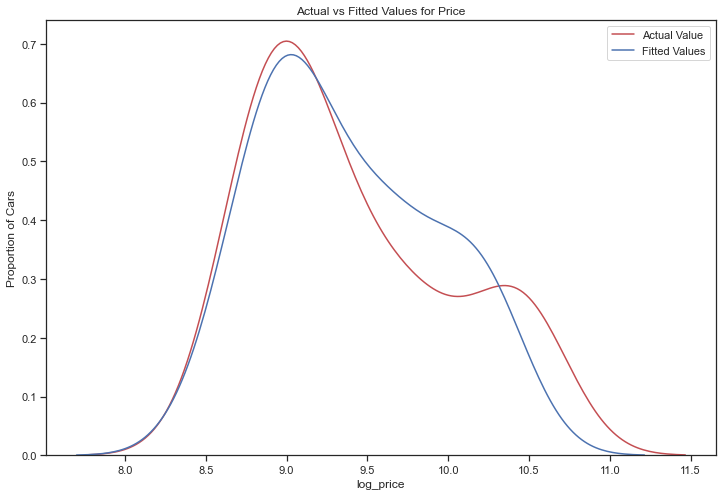

In [69]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(y_pred, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

### Using Pipeline with Linear Model

In [70]:
#fiting pipeline
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),
       ('model', LinearRegression())]
pipe=Pipeline(Input) 
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [71]:
# Prediction
ypipe=pipe.predict(X_test) 
ypipe[0:4]

array([-17253911.41872345, -17930639.46006697,  -7688805.11997417,
          608889.45437892])

In [72]:
# model evalution R^2
print('The R^2 is: ', pipe.score(X_test, y_test))

The R^2 is:  -3801464597413635.0


In [73]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, ypipe, squared=False))

The MSE is:  37455456.900169566


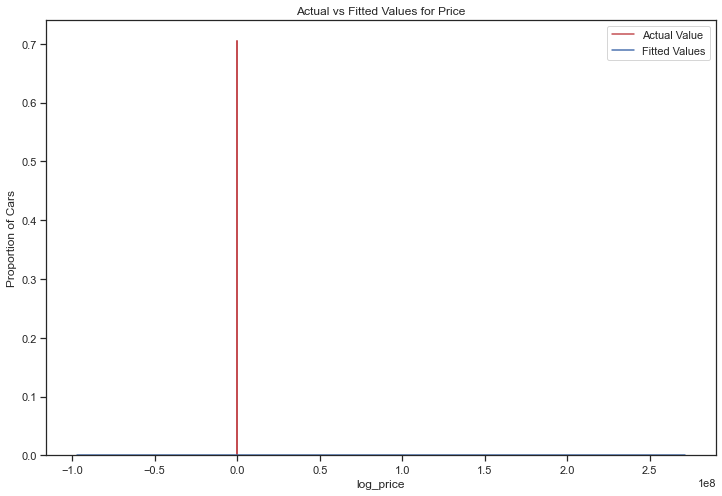

In [74]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypipe, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

### Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
# fitting ridge model
RidgeModel = Ridge(alpha=0.1) 
RidgeModel.fit(X_train, y_train) 

Ridge(alpha=0.1)

In [76]:
# Prediction
yridge=RidgeModel.predict(X_test) 
yridge[0:4]

array([ 9.00991859, 10.0986254 ,  8.77242251,  8.9433314 ])

In [77]:
# model evalution R^2
print('The R^2 is: ', RidgeModel.score(X_test, y_test))

The R^2 is:  0.9031898796551443


In [78]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yridge, squared=False))

The MSE is:  0.1890166248690363


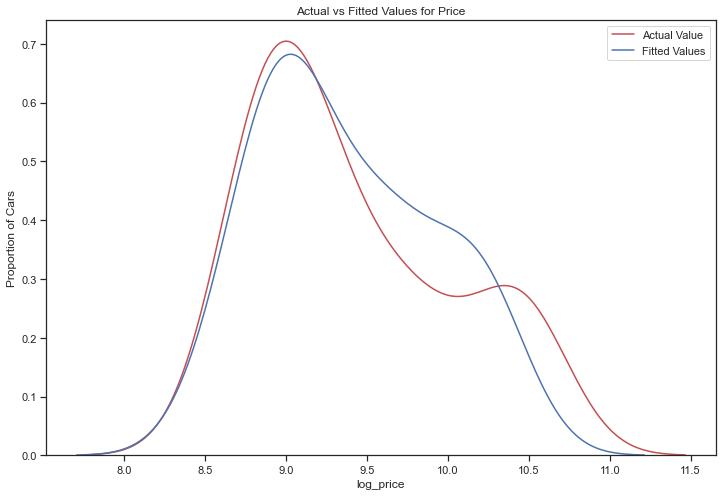

In [79]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(yridge, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

### Polynomial Regression

In [80]:
# fitting a polynomial feature of degree 2
pol2=PolynomialFeatures(degree=2) 
X_train_pol2=pol2.fit_transform(X_train) 
X_test_pol2=pol2.fit_transform(X_test)
RidgeModel2 = Ridge(alpha=0.1) 
RidgeModel2.fit(X_train_pol2, y_train) 

Ridge(alpha=0.1)

In [81]:
# Prediction
ypol2 = RidgeModel2.predict(X_test_pol2)
ypol2[0:4]

array([ 9.09530614, 10.35393918,  8.81206416,  8.98477381])

In [82]:
# model evalution R^2
print('The R^2 is: ', RidgeModel2.score(X_test_pol2, y_test))

The R^2 is:  0.8059259354049353


In [83]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, ypol2, squared=False))

The MSE is:  0.26762296307861916


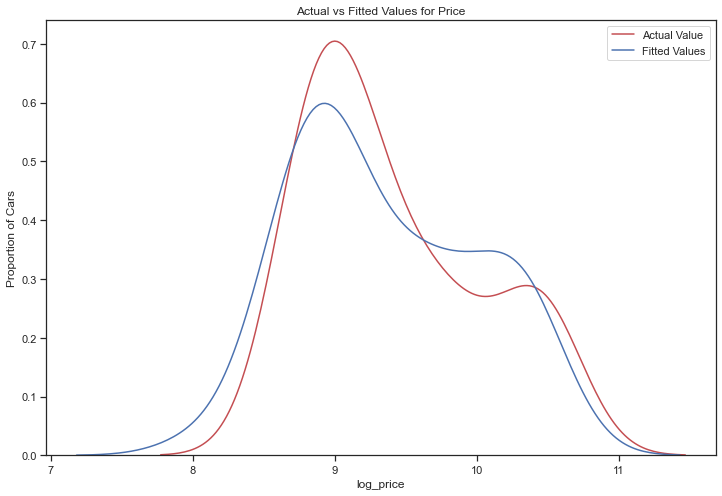

In [84]:
# Distribution plot
plt.figure(figsize=(12, 8))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypol2, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

In [85]:
# fitting a polynomial feature of degree 3
pol3=PolynomialFeatures(degree=3) 
X_train_pol3=pol3.fit_transform(X_train) 
X_test_pol3=pol3.fit_transform(X_test)
RidgeModel3 = Ridge(alpha=0.1) 
RidgeModel3.fit(X_train_pol3, y_train) 

Ridge(alpha=0.1)

In [86]:
# Prediction
ypol3 = RidgeModel3.predict(X_test_pol3)
ypol3[0:4]

array([ 8.90073903, 10.64327046,  8.70375739,  9.10665991])

In [87]:
# model evalution R^2
print('The R^2 is: ', RidgeModel3.score(X_test_pol3, y_test))

The R^2 is:  -1.1607415472800158


In [88]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, ypol3, squared=False))

The MSE is:  0.8929785673739354


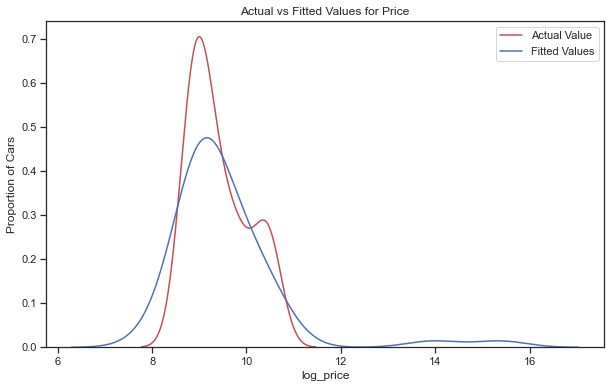

In [89]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(ypol3, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

### Random Forest Regressor

In [90]:
rf_reg = RandomForestRegressor(n_estimators = 1000,
                               n_jobs=-1,
                               random_state = 42, 
                               criterion= 'mse')
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [91]:
# Prediction
yrfreg = rf_reg.predict(X_test)
yrfreg[0:4]

array([ 8.88174839, 10.30430881,  8.72846704,  8.98494988])

In [92]:
# model evalution R^2
print('The R^2 is: ', rf_reg.score(X_test, y_test))

The R^2 is:  0.9466003912870904


In [93]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yrfreg, squared=False))

The MSE is:  0.14038110654611954


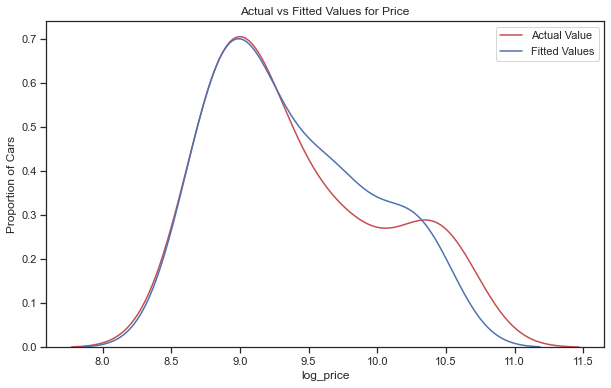

In [94]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(yrfreg, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

### Extra Trees Regressor

In [95]:
et_reg = ExtraTreesRegressor(n_estimators= 1000,
                               n_jobs=-1,
                               random_state= 42,
                               criterion= 'mse')

et_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [96]:
# Prediction
yetreg = et_reg.predict(X_test)
yetreg[0:4]

array([ 8.88120323, 10.30654111,  8.75884698,  9.00679468])

In [97]:
# model evalution R^2
print('The R^2 is: ', et_reg.score(X_test, y_test))

The R^2 is:  0.9516101080557842


In [98]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yetreg, squared=False))

The MSE is:  0.1336339944799268


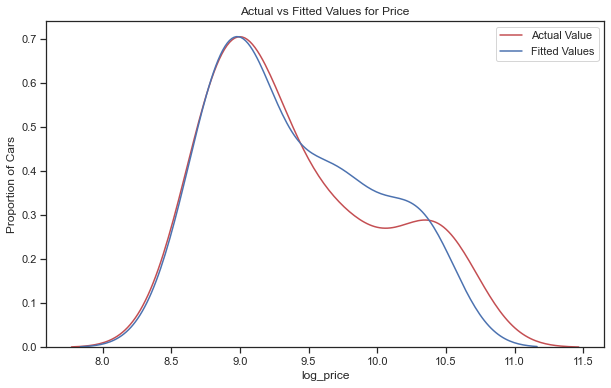

In [99]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot( yetreg, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

### XGBRegressor

In [100]:
xgb_reg = XGBRegressor(n_estimators= 1000, 
                       n_jobs=-1,
                       random_state= 42,
                       verbosity=0)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [101]:
# Prediction
yxgbreg = xgb_reg.predict(X_test)
yxgbreg[0:4]

array([ 8.901124 , 10.317095 ,  8.8018265,  9.007636 ], dtype=float32)

In [102]:
# model evalution R^2
print('The R^2 is: ', xgb_reg.score(X_test, y_test))

The R^2 is:  0.948175678156223


In [103]:
# Model Evaluation MSE
print('The MSE is: ', mean_squared_error(y_test, yxgbreg, squared=False))

The MSE is:  0.13829498702557103


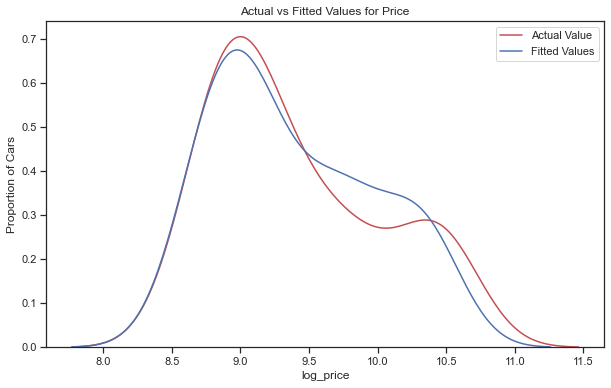

In [104]:
# Distribution plot
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
ax1 = sns.kdeplot(yxgbreg, color="b", label="Fitted Values")

plt.title('Actual vs Fitted Values for Price') 
plt.xlabel('log_price') 
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show() 
plt.close()

### R-Squared

In [105]:
# Linear Regression
LR_R2 = round(linear_model.score(X_test, y_test), 2)
# Pipeline with linear Regression
PL_R2 = round(pipe.score(X_test, y_test), 2)
# Ridge Regression
RR_R2 = round(RidgeModel.score(X_test, y_test), 2)
# Polynomial Regression with degree 2
PR2_R2 = round(RidgeModel2.score(X_test_pol2, y_test), 2)
# Polynomial Regression with degree 3
PR3_R2 = round(RidgeModel3.score(X_test_pol3, y_test), 2)
# Random Forest Regressor
RFR_R2 = round(rf_reg.score(X_test, y_test), 2)
#Extra Trees Regressor
ETR_R2 = round(et_reg.score(X_test, y_test), 2)
# XGBRegressor
XGB_R2 = round(xgb_reg.score(X_test, y_test), 2)

R2_list = [LR_R2, PL_R2, RR_R2, PR2_R2, PR3_R2, RFR_R2, ETR_R2, XGB_R2]
R2_list

[0.9, -3801464597413635.0, 0.9, 0.81, -1.16, 0.95, 0.95, 0.95]

### MSE

In [106]:
# Multiple Linear Regression
LR_MSE = round(mean_squared_error(y_test, y_pred, squared=False),2)
# Pipeline with linear Regression
PL_MSE = round(mean_squared_error(y_test, ypipe, squared=False), 2)
# Ridge Regression
RR_MSE = round(mean_squared_error(y_test, yridge, squared=False), 2)
# Polynomial Regression with degree 2
PR2_MSE = round(mean_squared_error(y_test, ypol2, squared=False), 2)
# Polynomial Regression with degree 3
PR3_MSE = round(mean_squared_error(y_test, ypol3, squared=False), 2)
# Random Forest Regressor
RFR_MSE = round(mean_squared_error(y_test, yrfreg, squared=False), 2)
#Extra Trees Regressor
ETR_MSE = round(mean_squared_error(y_test, yetreg, squared=False), 2)
# XGBRegressor
XGB_MSE = round(mean_squared_error(y_test, yxgbreg, squared=False), 2)

MSE_list = [LR_MSE, PL_MSE, RR_MSE, PR2_MSE, PR3_MSE, RFR_MSE, ETR_MSE, XGB_MSE]
MSE_list

[0.19, 37455456.9, 0.19, 0.27, 0.89, 0.14, 0.13, 0.14]

### Report

In [107]:
# fomulate the report format
Report = pd.DataFrame(R2_list, 
                      index=['Multiple Linear Regression', 
                             'Pipe Line with Linear Regression','Ridge Regression',
                             'Polynomial Regression of degree 2', 
                             'Polynomial Regression of degree 3', 
                             'Random Forest Regressor', 'Extra Tree Regressor',
                             'XGB Regressor']) 
Report.columns = ['R-Squared']
Report.insert(loc=1, column='MSE', value = MSE_list)
Report.columns.name = 'Algorithm'
Report

Algorithm,R-Squared,MSE
Multiple Linear Regression,9.000000e-01,0.19
Pipe Line with Linear Regression,-3.801465e+15,37455456.90
Ridge Regression,9.000000e-01,0.19
Polynomial Regression of degree 2,8.100000e-01,0.27
Polynomial Regression of degree 3,-1.160000e+00,0.89
Random Forest Regressor,9.500000e-01,0.14
Extra Tree Regressor,9.500000e-01,0.13
XGB Regressor,9.500000e-01,0.14


### Conclusion
Among all the models, the model Extra Trees Regressor fits better than the others. So we use Extra Trees Regressor model to predict the house prices.

### Prediction using Best Model

In [108]:
# House price prediction using the model Extra Trees Regressor
yetreg[0:10]

array([ 8.88120323, 10.30654111,  8.75884698,  9.00679468,  9.543042  ,
        8.61917743, 10.30568575,  9.32217449,  9.71680859, 10.38327343])

In [109]:
np.exp(yetreg[0:10])

array([ 7195.44328381, 29927.74073552,  6366.76632702,  8158.32923216,
       13947.31091916,  5536.83011208, 29902.15259861, 11183.27340208,
       16594.20116023, 32314.56796059])

### Save prediction in a csv file

In [110]:
prediction = pd.DataFrame(index=y_test.index,columns=['Real Value','Prediction'])

prediction['Real Value'] = y_test
prediction['Prediction'] = yetreg


#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Car Price Prediction.csv'

prediction.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Car Price Prediction.csv
